In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib_inline

np.set_printoptions(suppress=True)

In [19]:
# Load & Clean data
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data , columns=cancer.feature_names)
df['target'] = cancer.target

X = StandardScaler().fit_transform(df.drop(columns=['target']))
y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,117 (523.90 KB)

 Trainable params: 44,705 (174.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,412 (349.27 KB)

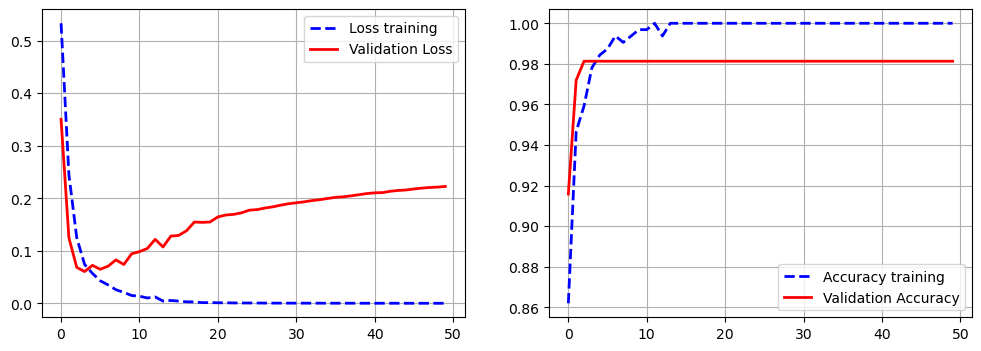

In [20]:
model_overfit = Sequential()
model_overfit.add(Input(shape=(30,)))
model_overfit.add(Dense(32  ,activation='relu'))
model_overfit.add(Dense(64  ,activation='relu'))
model_overfit.add(Dense(128 ,activation='relu'))
model_overfit.add(Dense(256 ,activation='relu'))

model_overfit.add(Dense(1  , activation='sigmoid'))

model_overfit.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model_overfit.fit(X_train , y_train ,
         epochs=50,
         batch_size=32,
         verbose=0,
         validation_split=.25)

model_overfit.summary()


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'] , '--' , c='b' , lw=2 , label='Loss training')
plt.plot(history.history['val_loss'] , '-' , c='r' , lw=2 , label='Validation Loss')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'] , '--' , c='b' , lw=2 , label='Accuracy training')
plt.plot(history.history['val_accuracy'] , '-' , c='r' , lw=2 , label='Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

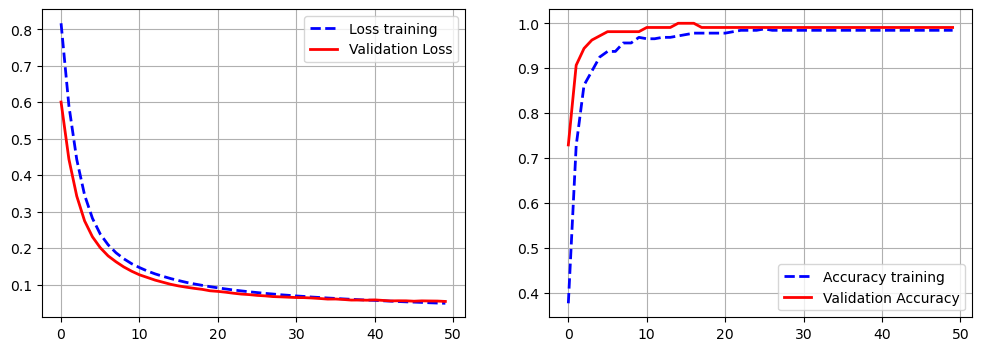

In [21]:
model = Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(32 , activation='relu'))
model.add(Dense(1  , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='loss',patience=1)
history = model.fit(X_train , y_train ,
         epochs=50,
         batch_size=32,
         verbose=0,
         validation_split=.25,
         callbacks=[callback])

model.summary()

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'] , '--' , c='b' , lw=2 , label='Loss training')
plt.plot(history.history['val_loss'] , '-' , c='r' , lw=2 , label='Validation Loss')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'] , '--' , c='b' , lw=2 , label='Accuracy training')
plt.plot(history.history['val_accuracy'] , '-' , c='r' , lw=2 , label='Validation Accuracy')
plt.grid()
plt.legend()
plt.show()